#Importing Libraries

In [121]:
import numpy as np #for linear algebra
import pandas as pd #for chopping, processing
import csv #for opening csv files
%matplotlib inline
import matplotlib.pyplot as plt #for plotting the graphs
from sklearn.linear_model import LogisticRegression #for logistic regression
from sklearn.pipeline import Pipeline #to assemble steps for cross validation
from sklearn.preprocessing import PolynomialFeatures #for all the polynomial features
from sklearn import svm #for Support Vector Machines
from sklearn.neighbors import NearestNeighbors #for nearest neighbor classifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier #for decision tree classifier
from sklearn.naive_bayes import GaussianNB  #for naive bayes classifier
from scipy import stats #for statistical info
from sklearn.model_selection import train_test_split # to split the data in train and test
from sklearn.model_selection import KFold # for cross validation
from sklearn.neighbors import KNeighborsClassifier  #for k-neighbor classifier
from sklearn import metrics  # for checking the accuracy
from time import time

#Loading and Pre-Processing Data

In [122]:
#load data
data = pd.read_csv("breast_cancer.csv")

In [123]:
#to know the number of cases and the number of variables
data.shape

(569, 33)

In [124]:
#drop ID because we do not need the ID number as shown above

data.drop('id',axis=1,inplace=True)
#check that dropped
data.head(1)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,M,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189,NaN


#Description of database

In [125]:
#how many cases are included in the dataset
length = len(data)
#how many features are in the dataset
features = data.shape[1]-1

# Number of malignant cases
malignant = len(data[data['diagnosis']=='M'])

#Number of benign cases
benign = len(data[data['diagnosis']=='B'])

#Rate of malignant tumors over all cases
rate = (float(malignant)/(length))*100

print("There are "+ str(len(data))+" cases in this dataset")
print("There are {}".format(features)+" features in this dataset")
print("There are {}".format(malignant)+" cases diagnosed as malignant tumor")
print("There are {}".format(benign)+" cases diagnosed as benign tumor")
print("The percentage of malignant cases is: {:.4f}%".format(rate))

There are 569 cases in this dataset
There are 31 features in this dataset
There are 212 cases diagnosed as malignant tumor
There are 357 cases diagnosed as benign tumor
The percentage of malignant cases is: 37.2583%


#Feature Encoding

In [126]:
from sklearn.preprocessing import LabelEncoder
label_encode = LabelEncoder()
data['diagnosis_label'] = label_encode.fit_transform(data['diagnosis'])

In [127]:
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,diagnosis_label
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN,1
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN,1
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN,1
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN,1
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN,1
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN,1
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN,1
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN,1


#Separating Features (X) and Labels (Y)

In [128]:
# Extract feature columns where everything but the diagnosis is included.
# I am separating all the features that are helpful in determining the diagnosis
X = data.drop(['diagnosis','diagnosis_label'], axis=1)
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [129]:
X = X.iloc[:, :-1]

In [130]:
#Our target is predicting the diagnosis in benign or malignant, so we need
#to extract this one as the dependent variable - the variable we will predict
Y = data['diagnosis_label']
Y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis_label, Length: 569, dtype: int64

In [131]:
# X should have 29 variables and 569 cases
X.shape

(569, 30)

In [132]:
# Y should have 1 variable - just the diagnosis and 569 cases
Y.shape

(569,)

In [133]:
# Show the feature information by printing the first row
# Show the traget information by also printing the first row
print("\nFeature values:")
print(X.head(1))
print("\nTarget values:")
print(Y.head(1))


Feature values:
   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38           122.8     1001.0           0.1184   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0            0.2776          0.3001               0.1471         0.2419   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0                 0.07871  ...         25.38          17.33            184.6   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                   0.1189  

[1 rows x 30 columns]

Target values:
0    1
Name: diagnosis_label, dtype: int64


#Showing Correlation

In [134]:
df=pd.DataFrame(data)

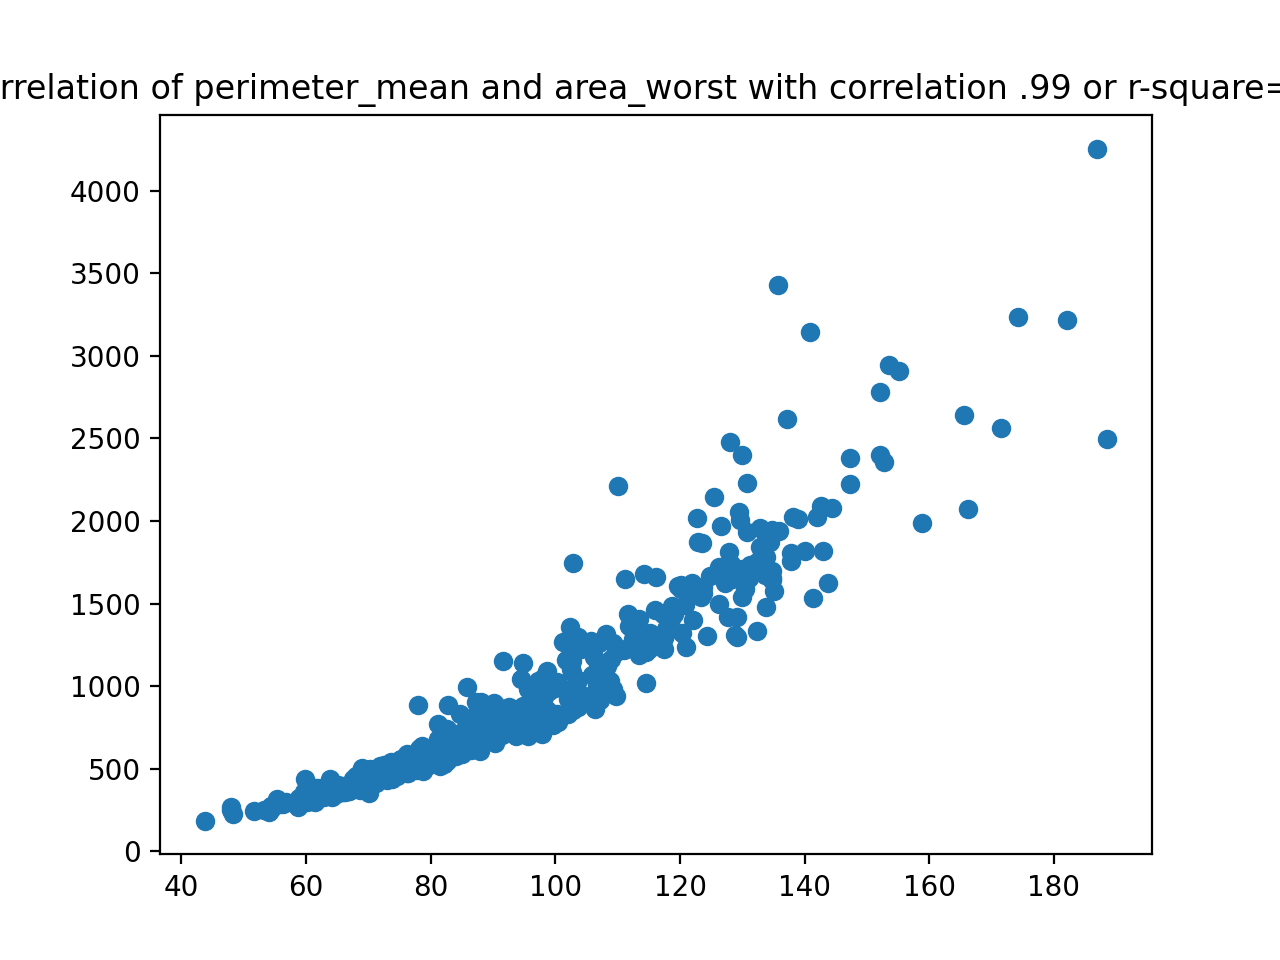

In [135]:
#Research shows that any variables that are highly correlated should be removed from further analysis. But, PCA takes care of multicollinearity, so maybe
#I identify which ones there are and let PCA to do its job.
#Just in case let's see how two highly correlated variables look like using prettyplots

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1)
for i in range(1):
    x=df['perimeter_mean']
    y=df['area_worst']
    ax.scatter(x,y, label=str(i))

ax.set_title('Correlation of perimeter_mean and area_worst with correlation .99 or r-square= .81')
fig.savefig('scatter.png')

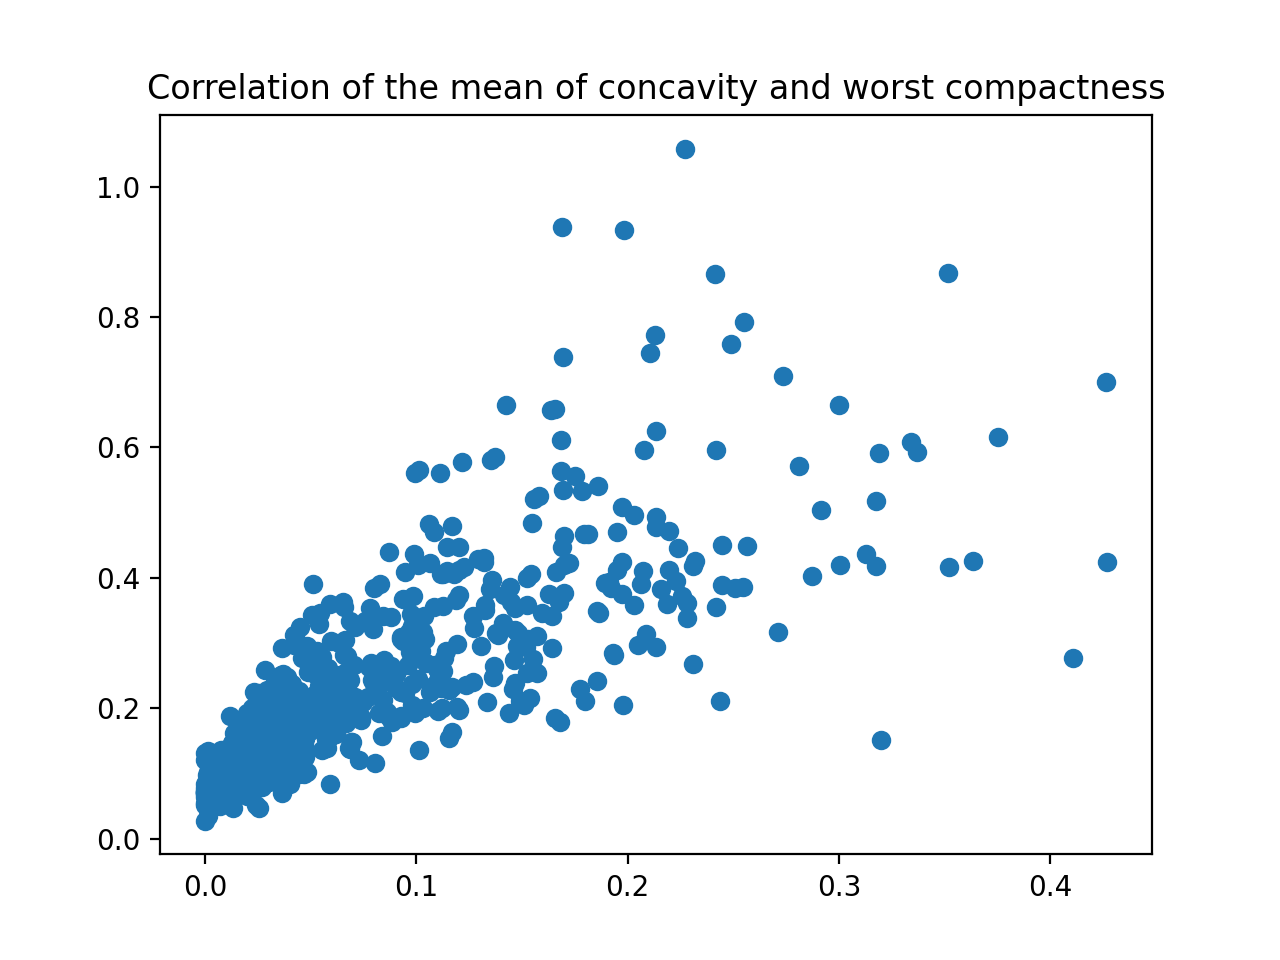

In [136]:
#Let's visualize another set of variables that are not correlated as highly as the first ones
#These have a correlation coefficient of .75 which means an r-squared score of approximately .49

fig, ax = plt.subplots(1)
for i in range(1):
    x=df['concavity_mean']
    y=df['compactness_worst']
    ax.scatter(x,y, label=str(i))

ax.set_title('Correlation of the mean of concavity and worst compactness')
fig.savefig('scatter.png')

#Splitting into Testing and Training Data

In [137]:
# Shuffle and split the dataset into the number of training and testing points above
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=40)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 455 samples.
Testing set has 114 samples.


#Running Classifiers

In [138]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [139]:
from sklearn.metrics import f1_score
def train_classifier(clf, X_train, Y_train):
    ''' Fits a classifier to the training data. '''

    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, Y_train)
    end = time()

    # Print the results
    print("Trained model in {:.4f} seconds".format(end - start))


def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''

    # Start the clock, make predictions, then stop the clock
    start = time()
    Y_pred = clf.predict(features)
    end = time()

    # Print and return results
    print("Made predictions in {:.4f} seconds.".format(end - start))
    return f1_score(target.values, Y_pred, pos_label=1)


def train_predict(clf, X_train, Y_train, X_test, Y_test):
    ''' Train and predict using a classifer based on F1 score. '''

    # Indicate the classifier and the training set size
    print("Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train)))

    # Train the classifier
    train_classifier(clf, X_train, Y_train)

    # Print the results of prediction for both training and testing
    print("F1 score for training set: {:.4f}.".format(predict_labels(clf, X_train, Y_train)))
    print("F1 score for test set: {:.4f}.".format(predict_labels(clf, X_test, Y_test)))

In [140]:
clf_A = KNeighborsClassifier()
clf_B = DecisionTreeClassifier(random_state=0)
clf_C = SVC()
clf_D = GaussianNB()
clf_E = RandomForestClassifier(n_estimators=10)

In [141]:
for clf in [clf_A, clf_B, clf_C, clf_D, clf_E]:
    for size in [300, 400]:
        train_predict(clf, X_train[:size], Y_train[:size], X_test, Y_test)
        print('\n')

Training a KNeighborsClassifier using a training set size of 300. . .
Trained model in 0.0038 seconds
Made predictions in 0.0361 seconds.
F1 score for training set: 0.9132.
Made predictions in 0.0162 seconds.
F1 score for test set: 0.8974.


Training a KNeighborsClassifier using a training set size of 400. . .
Trained model in 0.0025 seconds
Made predictions in 0.0308 seconds.
F1 score for training set: 0.9199.
Made predictions in 0.0106 seconds.
F1 score for test set: 0.9091.


Training a DecisionTreeClassifier using a training set size of 300. . .
Trained model in 0.0085 seconds
Made predictions in 0.0025 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0019 seconds.
F1 score for test set: 0.8684.


Training a DecisionTreeClassifier using a training set size of 400. . .
Trained model in 0.0109 seconds
Made predictions in 0.0019 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0019 seconds.
F1 score for test set: 0.8919.


Training a SVC using a train

#ROC Curves

In [142]:
from plotnine import ggplot, aes, geom_line, geom_abline, ggtitle

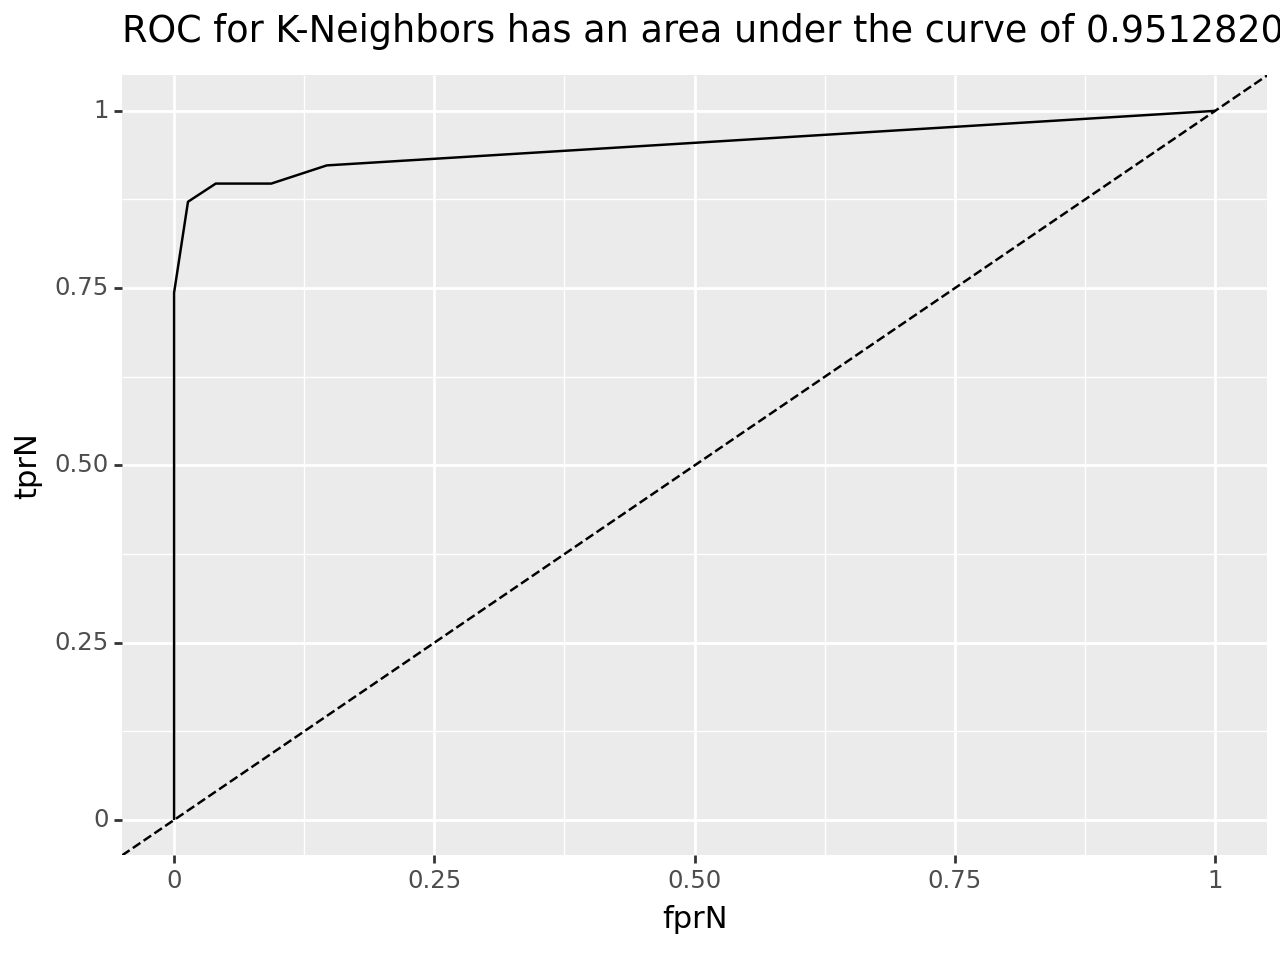

<Figure Size: (640 x 480)>

In [143]:
# ROC curve for K-Neighbors
preds = clf_A.predict_proba(X_test)[:,1]
fprN, tprN, _ = metrics.roc_curve(Y_test, preds)

df = pd.DataFrame(dict(fprN=fprN, tprN=tprN))
ggplot(df, aes(x='fprN', y='tprN')) +\
    geom_line() +\
    geom_abline(linetype='dashed')+\
    ggtitle ("ROC for K-Neighbors has an area under the curve of " + str(metrics.auc(fprN,tprN)))

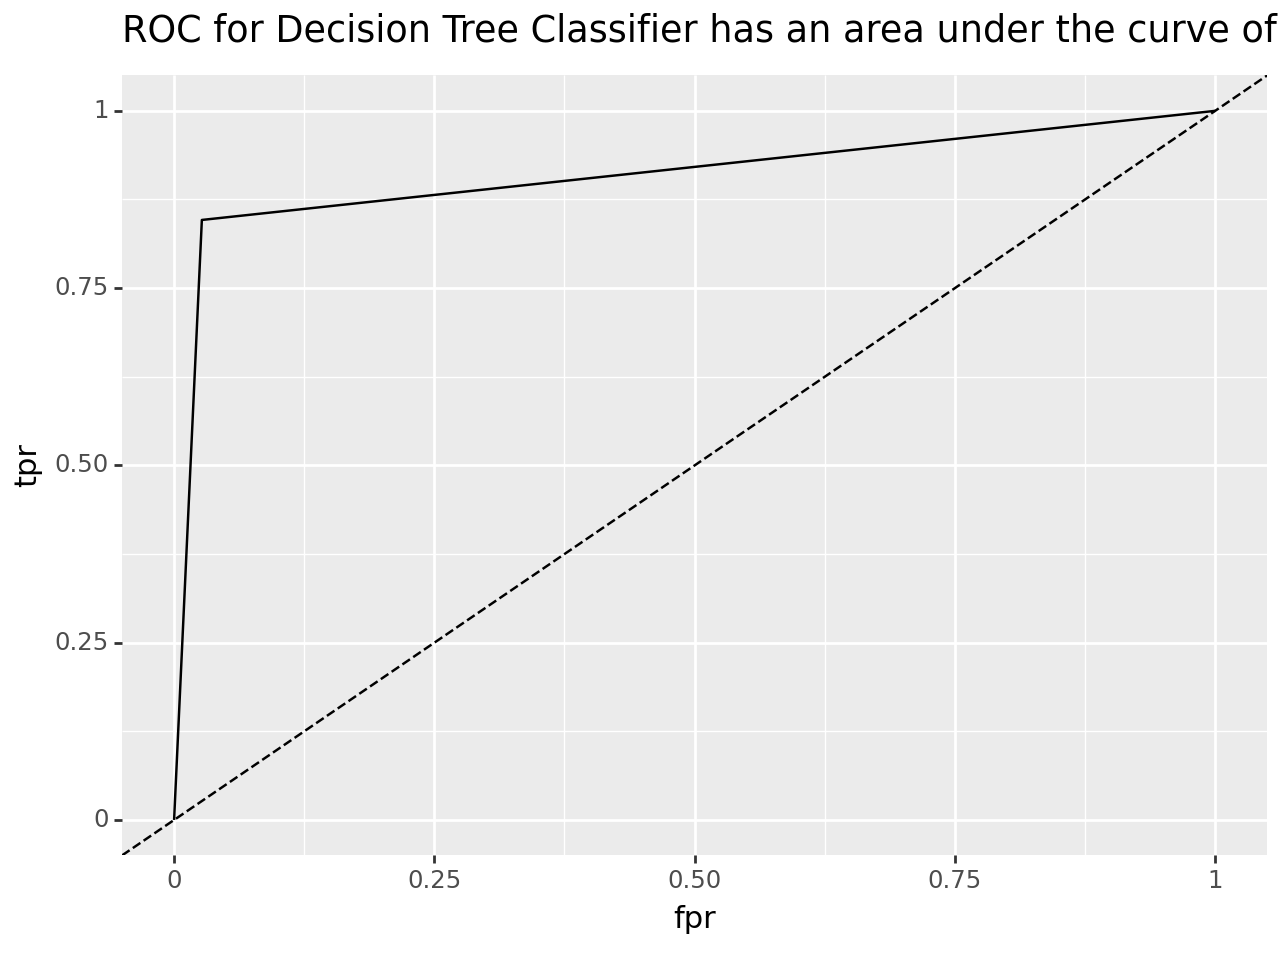

<Figure Size: (640 x 480)>

In [144]:
# ROC curve for Decision Tree Classifier
preds_dt = clf_B.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, _ = metrics.roc_curve(Y_test, preds_dt)

df_dt = pd.DataFrame(dict(fpr=fpr_dt, tpr=tpr_dt))
(ggplot(df_dt, aes(x='fpr', y='tpr')) +
 geom_line() +
 geom_abline(linetype='dashed') +
 ggtitle("ROC for Decision Tree Classifier has an area under the curve of " + str(metrics.auc(fpr_dt, tpr_dt))))

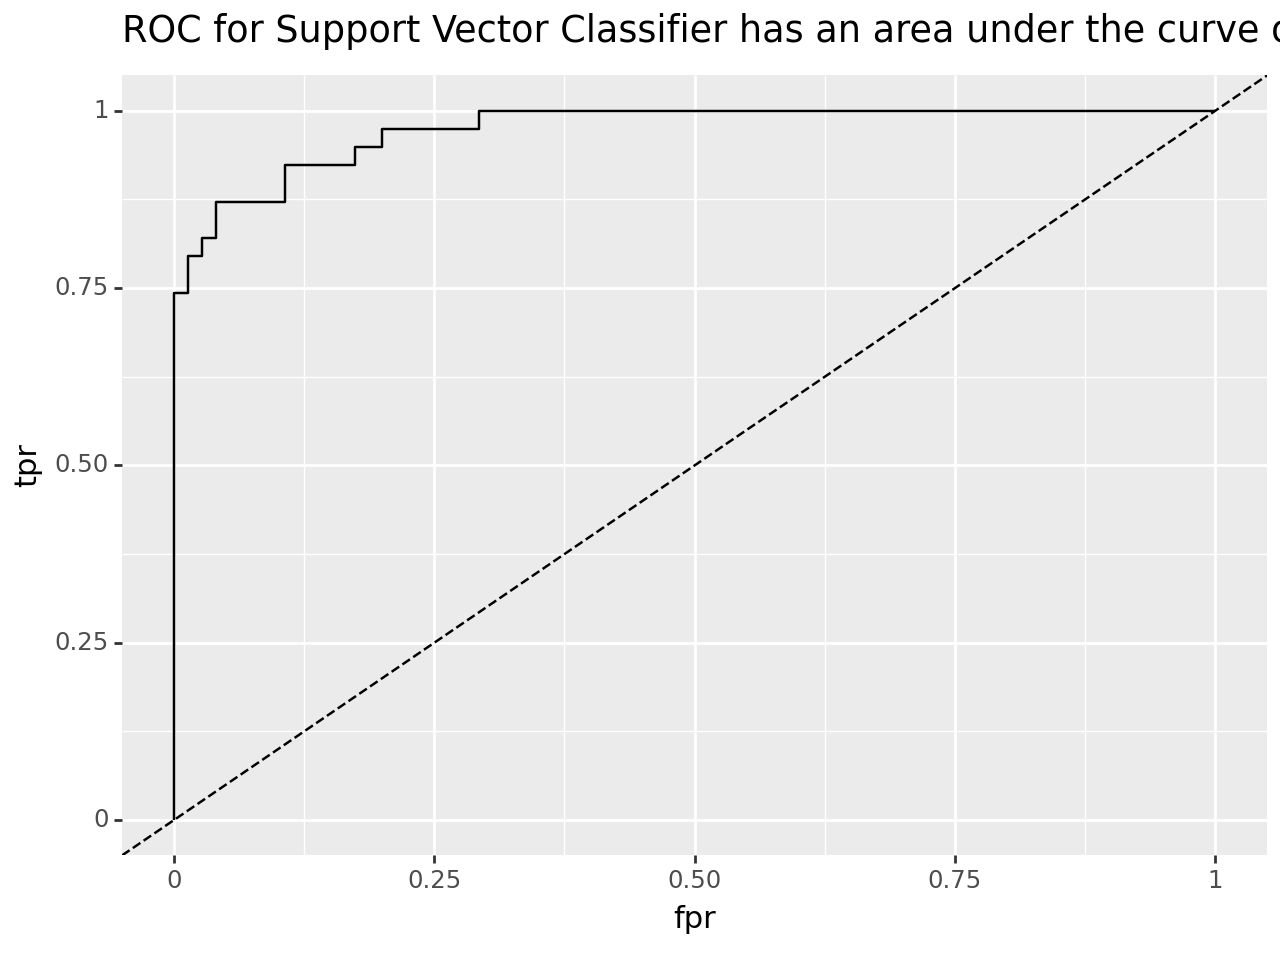

<Figure Size: (640 x 480)>

In [145]:
# ROC curve for Support Vector Classifier
preds_svc = clf_C.decision_function(X_test)
fpr_svc, tpr_svc, _ = metrics.roc_curve(Y_test, preds_svc)

df_svc = pd.DataFrame(dict(fpr=fpr_svc, tpr=tpr_svc))
(ggplot(df_svc, aes(x='fpr', y='tpr')) +
 geom_line() +
 geom_abline(linetype='dashed') +
 ggtitle("ROC for Support Vector Classifier has an area under the curve of " + str(metrics.auc(fpr_svc, tpr_svc))))

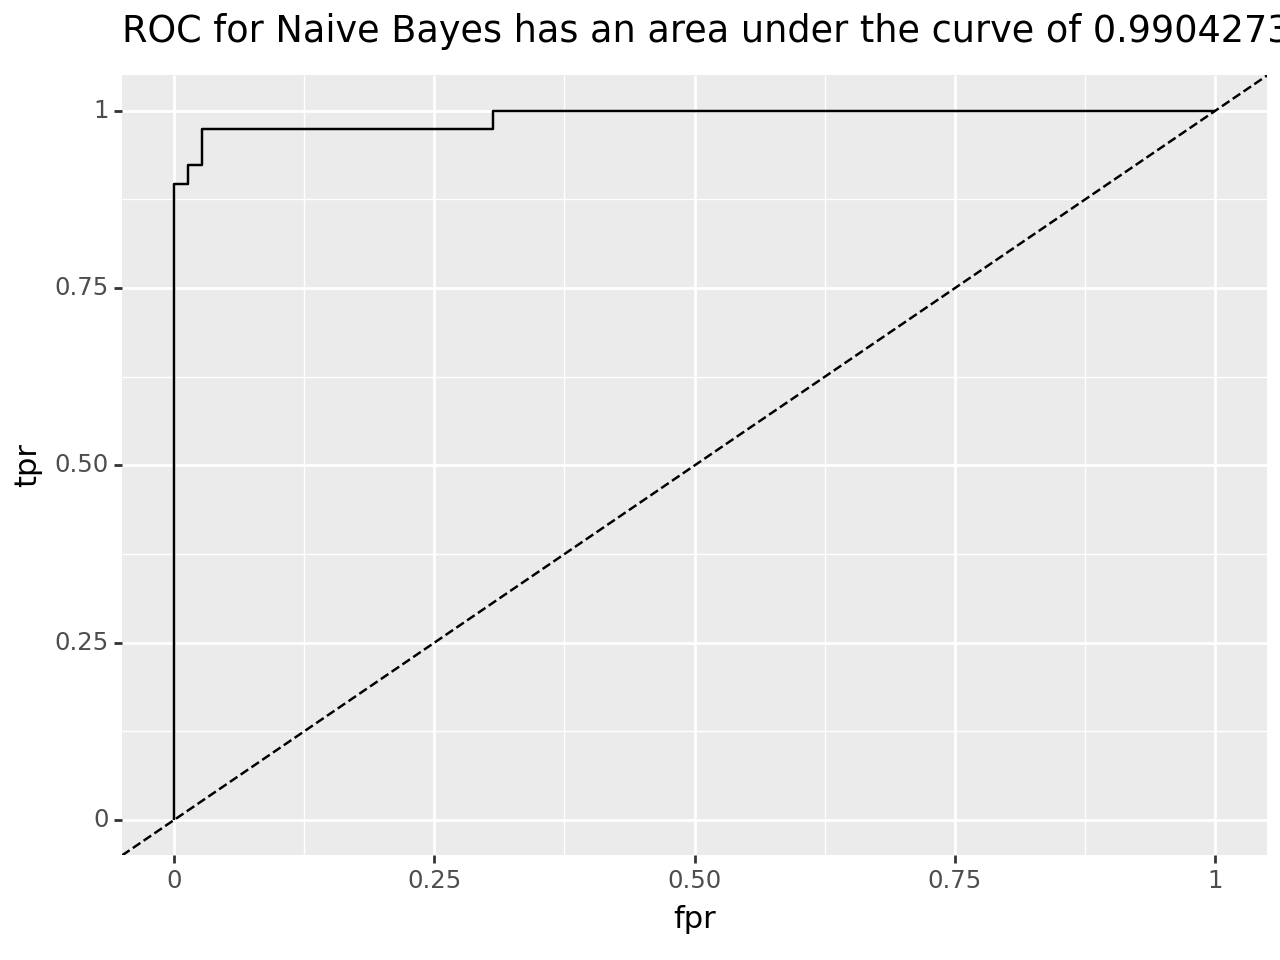

<Figure Size: (640 x 480)>

In [146]:
# ROC curve for Naive Bayes
preds = clf_D.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(Y_test, preds)

df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
ggplot(df, aes(x='fpr', y='tpr')) +\
    geom_line() +\
    geom_abline(linetype='dashed')+\
    ggtitle ("ROC for Naive Bayes has an area under the curve of " + str(metrics.auc(fpr,tpr)))
#auc = metrics.auc(fpr,tpr)
#ggtitle ("Area under the curve is "+ str(auc))
#ggtitle("ROC Curve w/ AUC=%s" % str(auc))

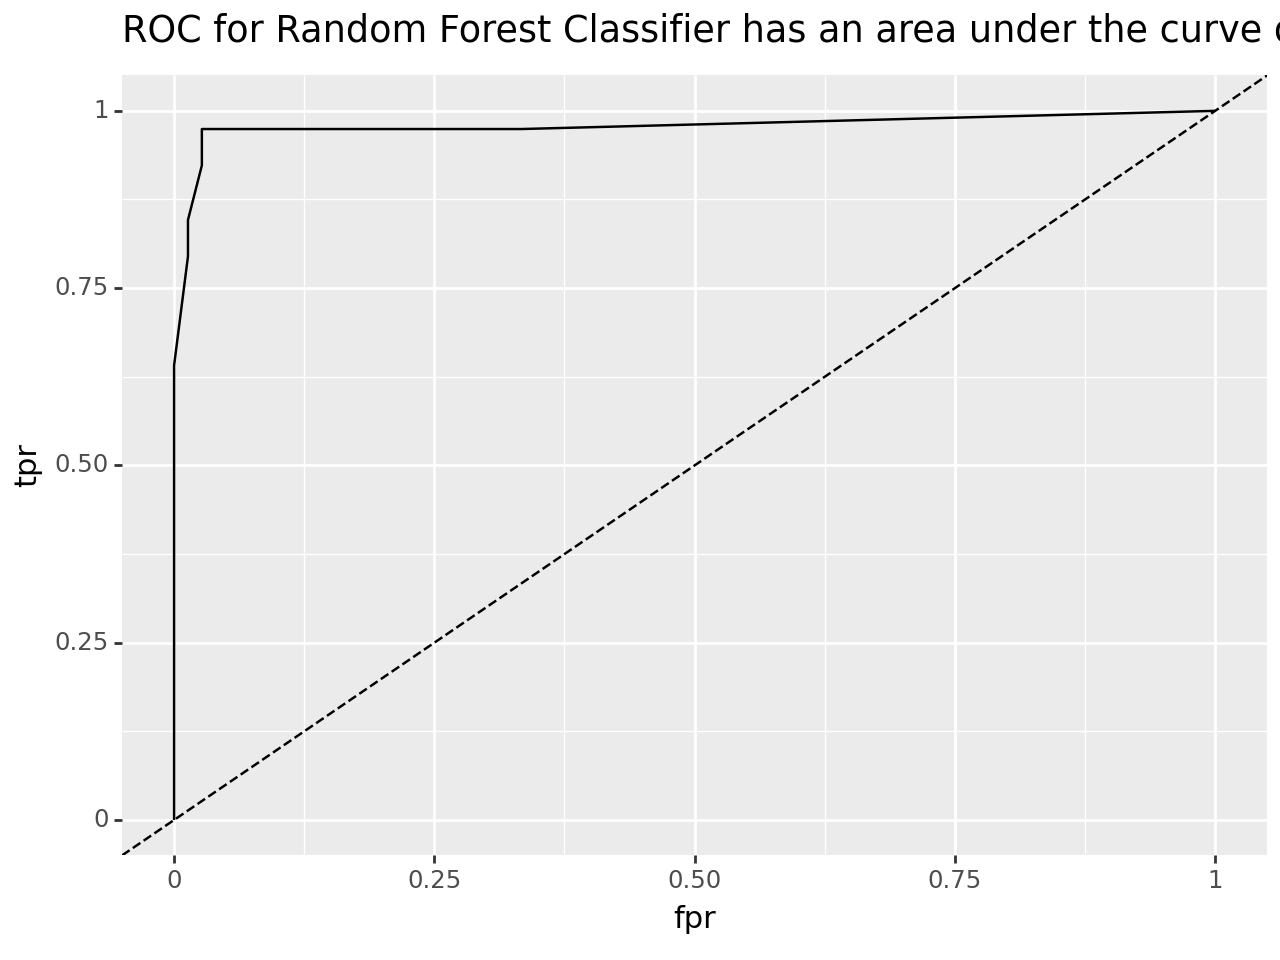

<Figure Size: (640 x 480)>

In [147]:
# ROC curve for Random Forest Classifier
preds_rf = clf_E.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = metrics.roc_curve(Y_test, preds_rf)

df_rf = pd.DataFrame(dict(fpr=fpr_rf, tpr=tpr_rf))
(ggplot(df_rf, aes(x='fpr', y='tpr')) +
 geom_line() +
 geom_abline(linetype='dashed') +
 ggtitle("ROC for Random Forest Classifier has an area under the curve of " + str(metrics.auc(fpr_rf, tpr_rf))))